In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset=pd.read_csv("/content/heart.csv")

#standardScaler = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13:14]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=145,activation="relu",input_dim=13))

#2nd hidden layer
model.add(Dense(units=120,activation="relu",))

#3rd hidden layer
model.add(Dense(units=70,activation="relu",))


#output layer
model.add(Dense(units=1,activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_his=model.fit(X_train,y_train,validation_split=0.30, batch_size=55,epochs=25,verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 145)               2030      
                                                                 
 dense_13 (Dense)            (None, 120)               17520     
                                                                 
 dense_14 (Dense)            (None, 70)                8470      
                                                                 
 dense_15 (Dense)            (None, 1)                 71        
                                                                 
Total params: 28,091
Trainable params: 28,091
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
10/10 [==============================] - 1s 18ms/step - loss: 0.5551 - accuracy: 0.7709 - val_loss: 0.4795 - val_accuracy: 0.8312
Epoch 2/25
10/10 [=======================

In [8]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.45)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test,y_pred))

9/9 [==============================] - 0s 1ms/step
0.9416342412451362
[[125   7]
 [  8 117]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       132
           1       0.94      0.94      0.94       125

    accuracy                           0.94       257
   macro avg       0.94      0.94      0.94       257
weighted avg       0.94      0.94      0.94       257



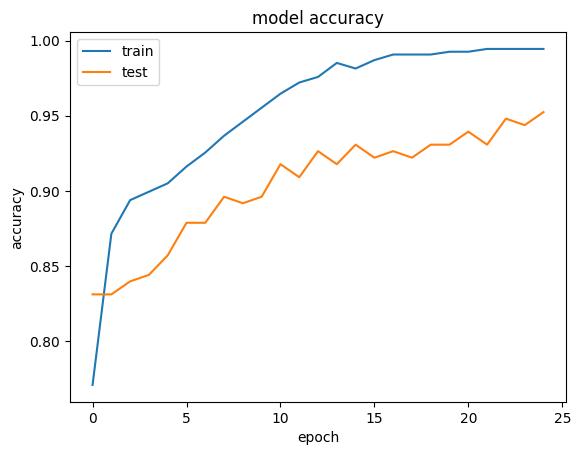

In [9]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

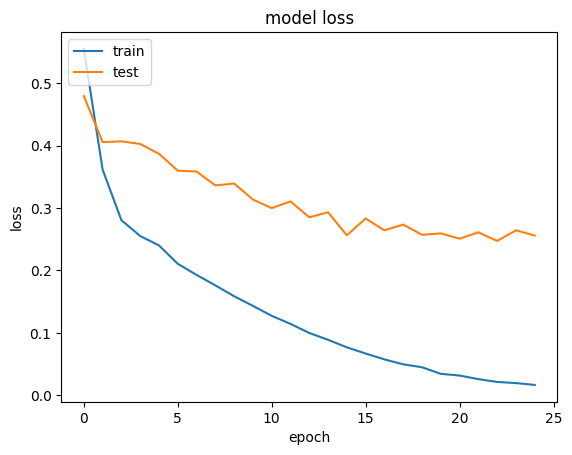

In [10]:
# summarize history for loss
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [13]:
model.save("heart.h5")
import tensorflowjs as tfjs
from keras.models import load_model
model.save('model.h5')
tfjs.converters.save_keras_model(model, "tfjsv3")
model_final = load_model('model.h5')

In [14]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

1/1 [==============================] - 0s 24ms/step
[[0.]]
The Person does not have a Heart Disease
